In [33]:
# Importing Libraries
import ast
import numpy as np
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [34]:
df = df[df['job_title_short']== 'Data Analyst']

In [35]:
df_explode = df.explode('job_skills')


In [39]:
skill_stats = df_explode.groupby('job_skills').agg(
    skill_count = ('job_skills','count'),
    median = ('salary_year_avg','median')
)

skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)

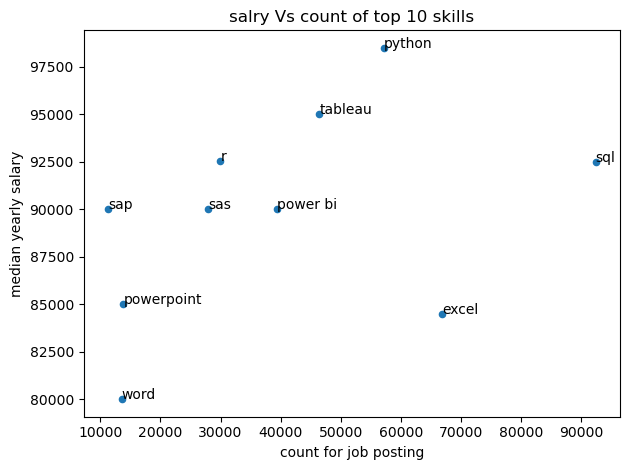

In [47]:
skill_stats.plot(kind='scatter', x='skill_count' , y ='median')
plt.xlabel('count for job posting')
plt.ylabel('median yearly salary')
plt.title('salry Vs count of top 10 skills')
plt.tight_layout()


for i, text in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median'].iloc[i],text)